<h1 style="text-align: center;">CHURN PREDICTION ANALYSIS FOR BLUE-VALLEY BANK</h1>

<img src='bank photo.jpg'>

<h3 style="font-size:36px;">Overview</h3>


<body>
At the Blue-Valley Bank,we noticed a worrying trend that clients were leaving and by the time this was realized it was too late to keep them.As the senior data scientist ,i led and investigation into five years of operational data to understand the root cause of these losses.By exploring features in the data uncovering of hidden signals that indicated customers churning was indentified

Using these insights we built a predictive model to segment customers by their churn risk that is high,moderate and low.Through this  the model transformed the bank's approach from reacting after the fact to proactively reaching out to vulnerable clients.Now armed with the model built the Blue valley bank is at a better position to retain valuable clients and prevent losses
</body>

<h3 style="font-size:36px;">Business Understanding</h3>


The source of my data set is from kaggle https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data 
    
My dataset is relevant since it has columns like age ,vintage which shows how long a client has stayed in a bank,customer net worth,last transaction which when doing feature engineering we can check how many days since the last transaction was done,we have dependents these are the people rellying upon the client,we have occupation what the client does we have the monthly ,average and current balances that helps us gauge what balance the clients have.

<h3 style="font-size:36px;"><b>Problem Statement</b></h3>


<body>
Blue-Valley Bank has faced rsing customer churn over the past five years,resulting in significant financial losses.The bank lacked a way to predict which customers were at risk of leavinf early enough to intervene.This project focuses on analyzing customer data to build a suitable  predictive model that identifies high risk churners and supports targeted retention efforts
</body>    

<h3 style="font-size:36px;">Main Objective</h3>



<body>
    How can we predict which clients of Blue-Valley bank are likely to churn and how can we segment them based on their churn risk using an appropriate predictive model?
    </body>

<h3 style="font-size:36px;">Specific Objective</h3>



<ul>
<li>Which features most influence whether a client will churn or not at Blue-Valley Bank?</li>
<li>Which predictive model between logistic and decision tree will most effectively identify clients likely to churn in terms of performance?</li>
<li>How can clients be segmented into high,moderate and low churn risk categories based on their predicated probability of churning?</li>
</ul>

<h3 style="font-size:36px;">DATA UNDERSTANDING</h3>


we first import libraries, load the dataset and the understand our data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [57]:
#loading the dataset 
df=pd.read_csv('churn_prediction.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [58]:
#check data infomation and preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

We have 28382 entries with 21 columns 6 integer columns 3 objects and 11 float columns

In [59]:
# we also check the descriptive analysis
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


<h3 style="font-size:36px;">DATA PREPARATION</h3>
<ol>
<li>Handle missing values</li>
<li>check for duplicates and remove</li>
<li>check for  outliers</li>
</ol>


In [60]:
# we will remove check for missing values and remove them 
df.isna().sum().sum()

3871

In [61]:
#lets see the columns that have missing values
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

For the missing values since the values have few missing values we will drop them the highest has 2463 

In [62]:
#df.dropna(subset=['gender','occupation','city','dependents'],inplace=True)
df.dropna(inplace=True)

In [63]:
#check if the missing values are gone for the three columns
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [64]:
df.head()#we check if there is another column that still has missing values

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [65]:
#change age to integer
df['age'].astype(int)

0        66
2        31
4        42
5        42
6        72
         ..
28377    10
28378    34
28379    47
28380    50
28381    18
Name: age, Length: 24832, dtype: int32

i noticed for the last transaction it had missing values and thats why it was not being detected so i had to convert to date time format and then drop the missing values since its 9.7% of the 28382 entries which is quite few 

In [66]:
# we will try to convert the column to right date time we see if it will see the date time change
df['last_transaction']=pd.to_datetime(df['last_transaction'],format='%Y/%m/%d')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [67]:
# we will check the missing values
df['last_transaction'].isna().sum().sum()

2765

In [68]:
df['last_transaction'].unique()

array(['2019-05-21T00:00:00.000000000',                           'NaT',
       '2019-11-03T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-09-24T00:00:00.000000000', '2019-07-12T00:00:00.000000000',
       '2019-12-12T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-11-09T00:00:00.000000000', '2019-12-28T00:00:00.000000000',
       '2019-10-23T00:00:00.000000000', '2019-11-30T00:00:00.000000000',
       '2019-12-08T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2019-12-27T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-08-28T00:00:00.000000000', '2019-10-15T00:00:00.000000000',
       '2019-12-21T00:00:00.000000000', '2019-09-25T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-09-22

In [69]:
df.dropna(subset=['last_transaction'],inplace=True)

In [70]:
df['last_transaction'].isna().sum().sum()#the null values in the last_transaction are now gone

0

Next step is checking for duplicates

In [71]:
df.duplicated().sum()# no duplicates present

0

Next step checking for outliers

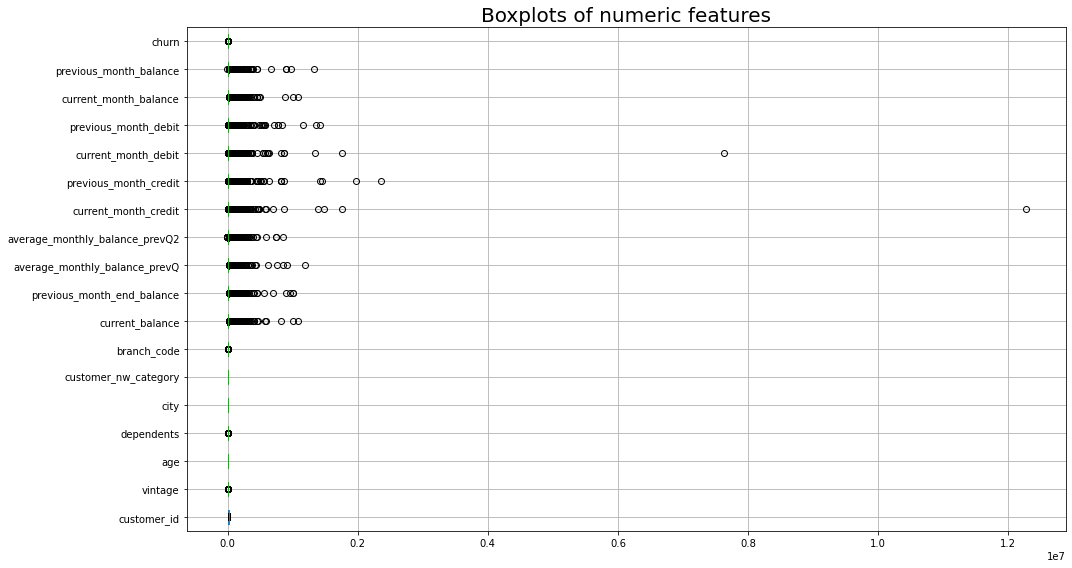

In [72]:
df.select_dtypes(include='number').boxplot(figsize=(15,8),vert=False)
plt.title("Boxplots of numeric features",fontsize=20)
plt.tight_layout()
plt.show()
        

As you can see majority here have outliers so i will try to remove the outliers so as to prevent biasness in the dataset

In [73]:
def outliers(df,col):
    upper_limit=df[col].mean() +3 *df[col].std()
    lower_limit=df[col].mean()-3 * df[col].std()
#create a list that will store the index of the outliers
    #ls=df.index[(df[cols] <lower_limit) | (df[cols] >upper_limit)]
    ls= df[(df[col] < lower_limit) | (df[col] > upper_limit)].index.tolist()

    return ls

In [74]:
index_list=[]

columns = ['current_balance', 'average_monthly_balance_prevQ',
           'average_monthly_balance_prevQ2', 'current_month_credit',
           'previous_month_credit', 'current_month_debit',
           'previous_month_debit', 'current_month_balance',
           'previous_month_balance']
for col in columns:
    index_list.extend(outliers(df,col))
    index_list=list(set(index_list))

In [75]:
df_cleaned=df.drop(index=index_list)

In [76]:
df_cleaned=df

<h4 style="font-size:36px;">EXPLORATIVE DATA ANALYSIS</h4>
<ol>
<li>check relationships between different features</li>
<li>check for correlation among features and drop if necessary</li>
<li>check for  distribution between churners and non churners</li>
</ol>

step1:<h7>Univariate Analysis</h7>

In [77]:
#check distribution between churners and non churners we see if they are equal or not
df['churn'].value_counts()
# as you can see we have an imbalanced dataset where we have more non churners than  churners we will handle that later in the code

0    17793
1     4274
Name: churn, dtype: int64

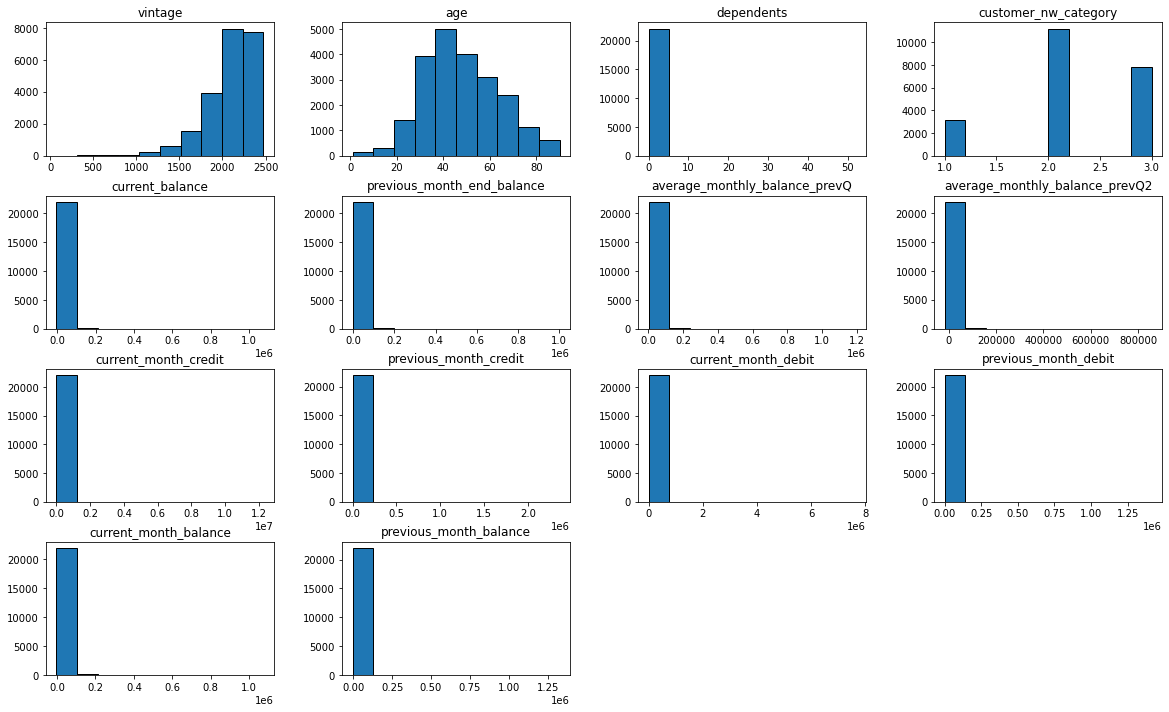

In [78]:
#For the numerical variables we will use histograms to check for skewness
exclude_columns=['customer_id','branch_code','churn','city']
columns=df.select_dtypes(include='number').drop(columns=exclude_columns)
columns.hist(figsize=(20,12),bins=10,edgecolor='black',grid=False)
plt.title("histogram of numeric features",fontsize=20)
plt.show()

The graph interpretation:   
Most of the graphs except vintage are rightly skewed for age is almost symmetrical so we have to scale,handle imbalance,one hot encode for categorical columns in the feature engineering stage

<H4>Bivariate Analysis Using One Graph</H4>
Here its giving us insights how churn is distributed in various columns the ones with boxplots are numerical the ones with counter plot are the once in categorical we have also done some feature engineering so that we can get the credit change,debit change how is the balance and how many days did the client take before doing another transaction at the end of the graph i will in detail explain the findings
NOTE:this interpration before scaling and handling imbalance


In [79]:
# Preprocessing for derived columns
df['credit_change'] = df['current_month_credit'] - df['previous_month_credit']
df['debit_change'] = df['current_month_debit'] - df['previous_month_debit']
df['balance_change'] = df['current_balance'] - df['previous_month_end_balance']
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
df['days_since_last_transaction'] = (df['last_transaction'].max() - df['last_transaction']).dt.days

<h5>Graph Interpration</h5>
<ol>
<li>Age vs churn>
churners(1) tend to be slighly younger than non churners(0)
here the median age of churners is lower
conclusion:Younger aged clients are the likely to churn since they may be slightly younger on average
</li>    
<li>Vintage vs churn>
the vintage refers to how long the client has stayed in the bank and this case the churned customers is significantly lower than the retained ones
conclusion:newer customers are more prone to churn the once who have stayed longer
</li>
<li>dependents vs churn>
most clients have dependents between 0-2 dependents especially in the churn category
the clients with more dependents are fewer and less likely to churn
</li>
<li>Net worth category vs churn>
The majority of clients or the non churners are in the second category,but when it comes to higher churn ratio which are the low net worth are the ones likely to churn
</li>
 <li>Occupation vs churn>
Salaried and self employed are the most common
self employed clients show high churn while retired and student clients show few churn
</li>
<li>current Balance vs churn>
churners seem to have lower current balance
</li>
<li>Credit change vs churn>
First there is high fluctuations in credit exist for both and we have to normalize due to skewness but there is no strong relationship between credit changes and churn
</li>
<li>Age vs balance change>
there is a weak positive correlation between the two 
</li>
<li>Days since last transaction vs churn>
The longer the last transation the more signs of inactivity and this might cause churn
</li>

<h3>Objective 1:Which features most influence whether a client will churn or not at Blue-Valley Bank</h3>
<ol>
    <li>i will start with logistic regression for interpretability</li>
    <li>i will then add decision tree classifier to capture non linear effects and interactions</li>
    <li>i will the compare top features from both models to cross-validate insights</li>
    </ol>
we will use this two models to actually help us capture the features or columns that influence churn


<h4>Model Preprocessing</h4>
<ol>
<li>one hot encode for categorical features</li>
<li>Normalize numerical features </li>
    <li>Use Smote for imbalance</li>
</ol>

step1:preprocess the data by first one hot encoding and normalizing numerical values

In [80]:
df_encoded=pd.get_dummies(df,columns=['occupation','gender'],drop_first=True)
df_encoded

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,last_transaction,credit_change,debit_change,balance_change,days_since_last_transaction,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,gender_Male
0,1,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,...,2019-05-21,0.00,0.00,0.00,224,0,0,1,0,1
4,6,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,...,2019-11-03,-714.28,-949.44,-474.00,58,0,0,1,0,1
5,7,1923,42,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,...,2019-11-01,0.00,571.43,-857.14,60,0,0,1,0,0
6,8,2048,72,0.0,1020.0,1,1,7006.93,7714.19,7859.74,...,2019-09-24,0.00,860.38,-707.26,98,1,0,0,0,1
7,9,2009,46,0.0,623.0,2,317,10096.58,8519.53,6511.82,...,2019-07-12,0.00,-5245.31,1577.05,172,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2398,42,0.0,146.0,2,286,7493.69,6777.41,8082.48,...,2019-11-04,-89.59,-79.84,716.28,57,0,0,1,0,1
28377,30297,2325,10,0.0,1020.0,2,1207,1076.43,1076.43,2282.19,...,2019-10-22,0.00,0.00,0.00,70,0,0,0,1,0
28378,30298,1537,34,0.0,1046.0,2,223,3844.10,4069.21,3668.83,...,2019-12-17,-0.58,-113.07,-225.11,14,0,0,1,0,0
28379,30299,2376,47,0.0,1096.0,2,588,65511.97,61017.55,53444.81,...,2019-12-31,783.78,96.43,4494.42,0,0,1,0,0,1


for normalizing my data i will use min max scaler since as we have seen in the graph on the EDA analysis we have skewed dataset and if my dataset was normally distributed we would have used standard scaler

In [81]:
# here we used min max scaler since in the EDA we noticed the values are not normally distributed
columns = ['current_balance', 'average_monthly_balance_prevQ',
           'average_monthly_balance_prevQ2', 'current_month_credit',
           'previous_month_credit', 'current_month_debit',
           'previous_month_debit', 'current_month_balance',
           'previous_month_balance']
scaler=MinMaxScaler()
df_encoded[columns]=scaler.fit_transform(df_encoded[columns])

we will then define our X and y which is features and target respectively

In [82]:
X=df_encoded.drop(columns=['churn','last_transaction'])
y=df_encoded['churn']
# we dropped last transaction since its in date time remember at EDA we did feature engineering by getting the days since last transaction

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

we will the use smote to handle class imbalance as seen in the EDA analysis

In [84]:
#We will the use class balanced to handle To handle imbalance as you saw on the EDA analysis the 0 and 1 was so imbalanced
smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [85]:
#We will now use the logistic regression as the base line model to find the coefficients and we will keep on improving it incase it overfits and underfits
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [86]:
#here we create a dataframe for absolute coefficients as importance
coeff=pd.DataFrame({
    'Feature':X_train_resampled.columns,
    'Importance':np.abs(model_log.coef_[0]),
    
}).sort_values(by='Importance',ascending=False)# we have created a dataframe to find feature importance

In [87]:
# we will format the format importance to 3 decimal places for easier readability
coeff['Importance']=coeff['Importance'].round(3)
# we print to see the output
print(coeff.reset_index(drop=True))

                           Feature  Importance
0               occupation_retired       3.556
1               occupation_student       3.342
2              occupation_salaried       3.254
3         occupation_self_employed       2.706
4                      gender_Male       0.483
5             previous_month_debit       0.289
6             customer_nw_category       0.231
7   average_monthly_balance_prevQ2       0.227
8                       dependents       0.164
9    average_monthly_balance_prevQ       0.145
10          previous_month_balance       0.142
11           previous_month_credit       0.096
12           current_month_balance       0.057
13             current_month_debit       0.054
14            current_month_credit       0.018
15                 current_balance       0.015
16                             age       0.004
17     days_since_last_transaction       0.002
18                         vintage       0.001
19                     branch_code       0.000
20           

for what we have done at the above a postive coefficient means that the feature increase chance of churn and negative is the vice versa
using absolute coefficients measure the stregnth of the feature in regards to the churn column
a big absolute value has strong impact
a small absolute value has the feature has little impact and also we use it since it doesnt have a built in importance metric like decision trees

we will use decision tree model to also extract important features in our model

In [88]:
#we train the decision tree on the smote resampled data
model2=DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)

model2.fit(X_train_resampled,y_train_resampled)#this is the training

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [89]:
#we will now get the feature importances
tree_coeff=pd.DataFrame({
    'Feature':X_train_resampled.columns,
    'Importance':model2.feature_importances_
}).sort_values(by='Importance',ascending=False)

In [90]:
#WE WILL SHOW THE TOP 10 FEATURES
print(tree_coeff)

                           Feature  Importance
7                  current_balance    0.454808
19                  balance_change    0.181887
23        occupation_self_employed    0.125582
22             occupation_salaried    0.078495
14            previous_month_debit    0.067501
9    average_monthly_balance_prevQ    0.031135
21              occupation_retired    0.021294
18                    debit_change    0.011304
3                       dependents    0.009341
25                     gender_Male    0.006677
20     days_since_last_transaction    0.003677
5             customer_nw_category    0.002300
6                      branch_code    0.002022
8       previous_month_end_balance    0.001861
11            current_month_credit    0.001144
12           previous_month_credit    0.000973
24              occupation_student    0.000000
0                      customer_id    0.000000
17                   credit_change    0.000000
16          previous_month_balance    0.000000
15           

In [91]:
#WE WILL COMBINE THE BOTH MODEL RESULTS AND THEN GIVE THEM SIDE BY SIDE
comparison=pd.merge(
coeff.rename(columns={'Importance':'Logistic_Importance'}),
tree_coeff.rename(columns={'Importance':'Tree_Importance'}),
on='Feature',
how='outer'
)
# we will sort thr model using logistic regression
comparison=comparison.sort_values(by='Logistic_Importance',ascending=False)
# we will then display it side by side
print(comparison)

                           Feature  Logistic_Importance  Tree_Importance
0               occupation_retired                3.556         0.021294
1               occupation_student                3.342         0.000000
2              occupation_salaried                3.254         0.078495
3         occupation_self_employed                2.706         0.125582
4                      gender_Male                0.483         0.006677
5             previous_month_debit                0.289         0.067501
6             customer_nw_category                0.231         0.002300
7   average_monthly_balance_prevQ2                0.227         0.000000
8                       dependents                0.164         0.009341
9    average_monthly_balance_prevQ                0.145         0.031135
10          previous_month_balance                0.142         0.000000
11           previous_month_credit                0.096         0.000973
12           current_month_balance                0

cross_validation:From our observations we see that for logistic regresion the occupation and gender features are dominating and for the tree importance current balance is leading why?
so for the logistic regression as much as we scaled the features categorical features where not scaled and since we did one hot encoding we create many columns and this increases the coefficiency and numeric as you can see have small coefficients
for the decision trees as we can observe the high coefficient column in regards to churn is current balance and the benefit of this is that it also checks non linear relationships

<h3>Objective 2:<li>Which predictive model between logistic and decision tree is better in terms of performance in indetifying churn?</li></h3>

For the first objective we used logistic regression to check for feature importance with churn so we did the same for decision trees so we will do the ROC/AUC and confusion matrix to see which one performs better

In [92]:
# we will start evaluating code using the logistic regression
y_pred=model_log.predict(X_test)
#we will also predict probabilitied  for the  class 1
y_pred_proba=model_log.predict_proba(X_test)[:,1]

In [93]:
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
# here shows the accuracy,f1 score,precision and recall

In [94]:
print(f" model:logistic  regression:")
print(f"accuracy:{accuracy}")
print(f"F1_Score:{f1} ")
print(f"Recall:{recall}")
print(f"Precision:{precision}")

 model:logistic  regression:
accuracy:0.7288173991844132
F1_Score:0.2624768946395564 
Recall:0.24482758620689654
Precision:0.28286852589641437


In [95]:
# FOR The decision tree performance
y_pred2=model2.predict(X_test)
y_pred_proba2=model2.predict_proba(X_test)[:,1]

In [96]:
accuracy=accuracy_score(y_test,y_pred2)
f1=f1_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)


In [97]:
print(f" model:decision Trees:")

print(f"accuracy{accuracy}")

print(f" f1_Score{f1} ")

print(f"Recall{recall}")

print(f"Precision{precision}")

 model:decision Trees:
accuracy0.7689170820117807
 f1_Score0.5114942528735632 
Recall0.6137931034482759
Precision0.43842364532019706


<h7><b>THIS IS THE PERFORMANCE EVALUATION</b></h7>

<h7><b>Based on the performance our accuracy score for the logistic regression is:</b></h7>
 0.72 our recall is quite low 0.24 our precision is 0.27 while
 
<h7><b>decision trees</b></h7>
the accuracy is 0.76 which is 76%
f1 score is 51% or 0.51 
recall is 0.6 or 61%
precision is 0.4 or 43%

In comparison to the two models decision trees performs way better even though decision trees needs some improvements here and there its way better than logistic regression

we also observed that even in terms of feature importance decision trees seem to indentify non linear relationships and not affected by the one hot encoding done unlike logistic regression which even after we handled imbalance we handled scaling and did one hot encoding its performance was low

<B>in conclusion:we will chose the decision trees as the final model but we will improve it then use it for segmenting churners into high low and moderate risk churners</B>


<h3>Objective 3:<li>How can clients be segmented into high,moderate and low churn risk categories based on their predicated probability of churning?</li></h3>


since we did identified decision trees as the best model for the project we will do the following:
<ol>
<li>We will check for overfitting and we will improve our model based on this</li>
<li>We will then segment our clients into high,moderate and low risk churn categories</li>
</ol>

step1:checking overfitting
we will do this my comparing the train and test if the train is way higher than test set we will do prunning which is removing unwanted features so as to improve model performance

In [98]:
#here we are testing or rather comparing the test and trained data to see if there is overfitting
#if overfitting is present the training data will either be abit or way higher than test data

train=model2.predict(X_train_resampled)
test=model2.predict(X_test)
#Accuracy
train_accuracy=accuracy_score(y_train_resampled,train)
test_accuracy=accuracy_score(y_test,test)
print(f"accurate scores are :Train: {train_accuracy},    Test: {test_accuracy}")

accurate scores are :Train: 0.7795283879570496,    Test: 0.7689170820117807


<h3>Assessing results</h3>
based ont the results of the training and testing of data there is a slight overfitting of the model hence it could be contributing to low precision.
We will draw an ROC /AUC CURVE to see how it looks then we use prunning to solve the overfitting


In [99]:
# we will first calculate the probailty scores of each datapoints
y_score=model2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_score)
AUC=auc(fpr,tpr)
print('AUC:',AUC)

AUC: 0.7515783516255417


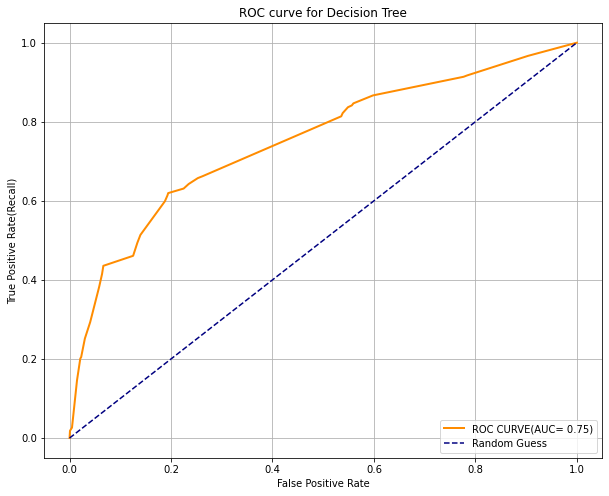

In [100]:
# we will the plot the ROC CURVE
plt.figure(figsize=(10,8))
sns.lineplot(x=fpr,y=tpr,color='darkorange',lw=2,label=f'ROC CURVE(AUC={AUC: .2f})')
plt.plot([0,1],[0,1],color='navy',linestyle='--',lw=1.5,label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<h7><b>summary of my graph</b></h7>

My model is doing fairly good in distinguishing between churners and non churners 

However its not really hugging the top left corner which it should near 1.0 so this indicates we nedd to improve the model and prunning is the best option here

<h4><b>PRUNNING</b><h/4>

We will do pre pruning the decision tree  this will help in limiting the depth and controlling how the splitting happens here will help in preventing overfiiting

In [129]:
tree_m=DecisionTreeClassifier(max_depth=5,   # reduce the depth to 5
                              min_samples_split=10,
                              min_samples_leaf=5,
                              random_state=42,
                              class_weight='balanced'
)

In [130]:
#WE WILL TRAIN THE MODEL
tree_m.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [131]:
#we will then make predictions
y_pred1=tree_m.predict(X_test)
y_proba=tree_m.predict_proba(X_test)[:,1]

the above the y_pred will give the class labels (0 or 1) for evaluating precision and also recla
y_proba gives the probabilities used in the ROC AND AUC SCORE

<B>We will evaluate performance</B>

In [122]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("ROC AUC SCORE",roc_auc_score(y_test,y_proba))
print("accuracy_score",accuracy_score(y_test,y_pred1))

[[2860  684]
 [ 336  534]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3544
           1       0.44      0.61      0.51       870

    accuracy                           0.77      4414
   macro avg       0.67      0.71      0.68      4414
weighted avg       0.80      0.77      0.78      4414

ROC AUC SCORE 0.7515783516255417
accuracy_score 0.7689170820117807


In [132]:
# we will first calculate the probailty scores of each datapoints
y_score1=tree_m.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_score)
AUC=auc(fpr,tpr)
print('AUC:',AUC)

AUC: 0.7515783516255417


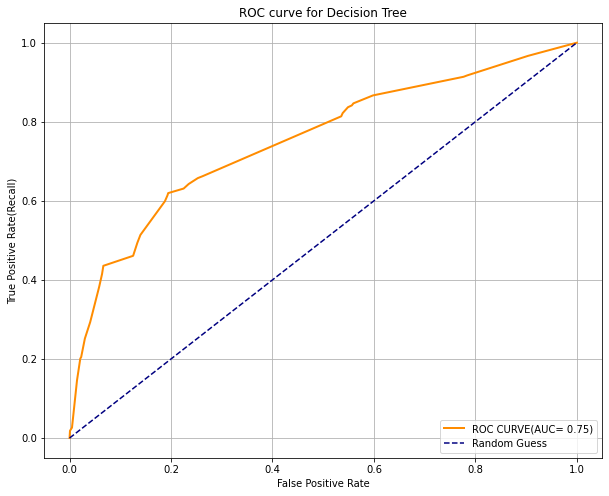

In [133]:
# we will the plot the ROC CURVE
plt.figure(figsize=(10,8))
sns.lineplot(x=fpr,y=tpr,color='darkorange',lw=2,label=f'ROC CURVE(AUC={AUC: .2f})')
plt.plot([0,1],[0,1],color='navy',linestyle='--',lw=1.5,label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Conclusion: As much our precision and recall has increased our AUC AND ROC is pretty the same but its fairly ok we will work with it
before pre prunning the recall was Recall0.6137931034482759 and precision was Precision0.43842364532019706
After preprunning the recall is


In [ ]:
# we have done the preprunning lets see any changes
y_scores=tree_m.predict_proba(X_test)[:,1]
precisions,recall,threshold=precision_recall_curve(y_test,y_scores)# we will see the thresholds and see how model is performing in terms of precision and recall

plt.plot(threshold,precision[:-1],label)

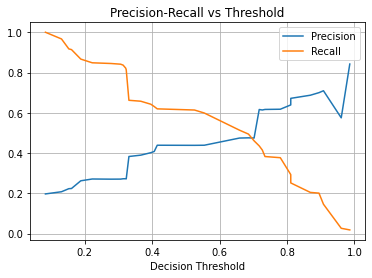

In [137]:

y_scores = tree_m.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)


plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.legend()
plt.grid()
plt.title("Precision-Recall vs Threshold")
plt.show()


In [ ]:
# we